# Astrostatistics Tools
@author: Rui Zhu  
@create date: 2022-11-28  
@cite: 
* https://docs.astropy.org/en/stable/stats/index.html
* https://docs.astropy.org/en/stable/stats/robust.html

In [1]:
from astropy import stats
import numpy as np
import matplotlib.pyplot as plt

## Sigma Clipping (sigma截断)
* 对于给定的数据点, sigma clipping方法通过计算中心值和标准差, 大于或小于几个sigma的数据将会被mask
* 该方法常用于排除离群值, 计算图像背景
* astropy提供了2个函数和1个类, 实现sigma clipping算法

In [2]:
# 测试数据
from astropy.io import fits
data = fits.getdata("/Users/rui/Code/1_Astronote/02_Astropy/example-data/2_1_astrostatistics/COSMOS-10511_f160w_sci.fits")

### FUNC1: sigma_clip()
* 返回一个<numpy.ma.core.MaskedArray>class
* 其中data为原始数据, mask: 离群值为True

In [3]:
from astropy.stats import sigma_clip

filtered_data = sigma_clip(data, sigma=3)
print(f"计算截断后的数据的平均值: {filtered_data.mean()}")
filtered_data

计算截断后的数据的平均值: -1.3184810098358986


masked_array(
  data=[[152.8809814453125, 295.6963195800781, 1039.0089111328125, ...,
         355.3902893066406, 411.1737365722656, 814.9829711914062],
        [239.03623962402344, 150.0624237060547, 658.2437744140625, ...,
         148.5971221923828, 200.18577575683594, 824.3134765625],
        [-758.0272827148438, -452.9622802734375, -0.8909907341003418,
         ..., 526.1747436523438, 646.82470703125, 132.43692016601562],
        ...,
        [-366.7578125, -610.5232543945312, -821.3389282226562, ...,
         -38.2124137878418, 71.95439910888672, 634.2199096679688],
        [316.4469909667969, 289.4877624511719, -95.87100982666016, ...,
         -50.02465057373047, 142.72386169433594, 633.7551879882812],
        [560.7808227539062, 376.77606201171875, 245.33934020996094, ...,
         -179.96697998046875, -300.1074523925781, -300.7674255371094]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False

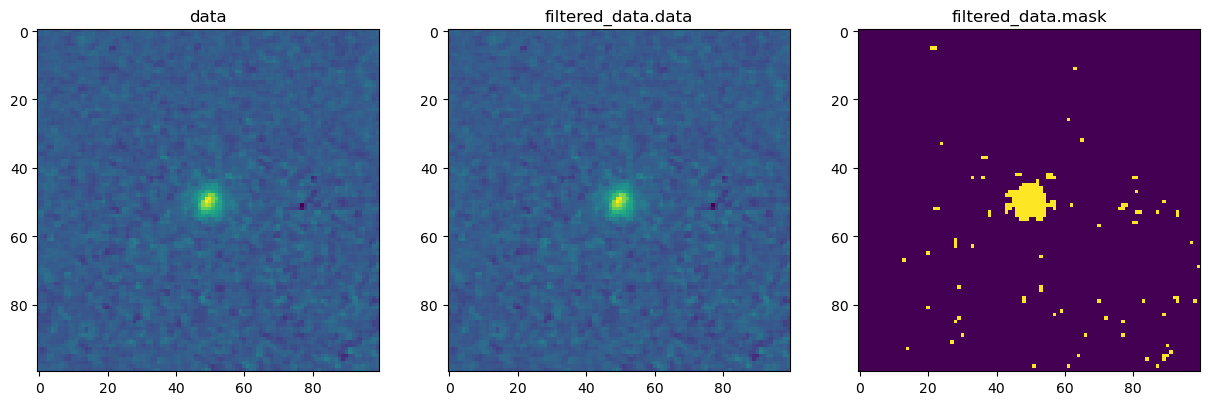

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title('data')
ax[0].imshow(data)
ax[1].set_title('filtered_data.data')
ax[1].imshow(filtered_data.data)
ax[2].set_title('filtered_data.mask')
ax[2].imshow(filtered_data.mask)

### FUNC2: [sigma_clipped_stats()](https://docs.astropy.org/en/stable/api/astropy.stats.sigma_clipping.sigma_clipped_stats.html#astropy.stats.sigma_clipping.sigma_clipped_stats)
* 返回sigma-clipped data的平均值、中位数、标准差

In [5]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(data, sigma=3)
print(f"mean: {mean}")
print(f"median: {median}")
print(f"std: {std}")

mean: -1.3184826374053955
median: -7.3723931312561035
std: 712.4392700195312


In [6]:
# 证明这与类表示的数据的结果是一样的
data_test = data[~filtered_data.mask]  # 取出没有被截断的数据
print(f"mean: {np.mean(data_test)}")
print(f"median: {np.median(data_test)}")
print(f"std: {np.std(data_test)}")

mean: -1.3184826374053955
median: -7.3723931312561035
std: 712.4392700195312


### CLASS: [SigmaClip](https://docs.astropy.org/en/stable/api/astropy.stats.sigma_clipping.SigmaClip.html#astropy.stats.sigma_clipping.SigmaClip)

In [7]:
from astropy.stats import SigmaClip
sigclip = SigmaClip(sigma=3)  # 实例化一个sigma=3的算法器
print(sigclip)

<SigmaClip>
    sigma: 3
    sigma_lower: 3
    sigma_upper: 3
    maxiters: 5
    cenfunc: 'median'
    stdfunc: 'std'
    grow: False


In [8]:
filtered_data_from_class = sigclip(data)
filtered_data_from_class

masked_array(
  data=[[152.8809814453125, 295.6963195800781, 1039.0089111328125, ...,
         355.3902893066406, 411.1737365722656, 814.9829711914062],
        [239.03623962402344, 150.0624237060547, 658.2437744140625, ...,
         148.5971221923828, 200.18577575683594, 824.3134765625],
        [-758.0272827148438, -452.9622802734375, -0.8909907341003418,
         ..., 526.1747436523438, 646.82470703125, 132.43692016601562],
        ...,
        [-366.7578125, -610.5232543945312, -821.3389282226562, ...,
         -38.2124137878418, 71.95439910888672, 634.2199096679688],
        [316.4469909667969, 289.4877624511719, -95.87100982666016, ...,
         -50.02465057373047, 142.72386169433594, 633.7551879882812],
        [560.7808227539062, 376.77606201171875, 245.33934020996094, ...,
         -179.96697998046875, -300.1074523925781, -300.7674255371094]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False

## Median Absolute Deviation (中值绝对偏差)
* 中值绝对偏差(MAD)的定义为: median(abs(a - median(a)))
* MAD是比方差更鲁棒的度量, 反映数据点的偏离程度

In [9]:
from astropy.stats import median_absolute_deviation
print(f"原始数据的MAD: {median_absolute_deviation(data=data)}")
print(f"sigma截断数据的MAD: {median_absolute_deviation(data=data[filtered_data.mask])}")
print(f"sigma截断后,剩余数据的MAD: {median_absolute_deviation(data=data[~filtered_data.mask])}")


原始数据的MAD: 478.166259765625
sigma截断数据的MAD: 1883.870849609375
sigma截断后,剩余数据的MAD: 468.84625244140625
